## Multiple Linear Regression Model
Dataset: Mastercard_stock_history

In [1]:
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#### Reading Data

In [2]:
file = pd.read_csv('../ML/Datasets/Mastercard_stock_history.csv')
x1 = file['Open'].values
x2 = file['High'].values
x3 = file['Low'].values
y = file['Close'].values
file.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0


#### Standardizing $x$ and $y$

In [3]:
x = np.c_[x1, x2]
x = (x - x.mean())/x.std()
y = (y - y.mean())/y.std()

x, y = x[:int(len(x)*0.8)], y[:int(len(y)*0.8)]
x_test, y_test = x[int(len(x)*0.8):], y[int(len(y)*0.8):]

In [4]:
def compute_cost(x, y, w, b):
    cost_sum = 0.0
    for i in range(x.shape[0]):
        yi = np.dot(x[i], w) + b
        cost_sum += (yi - y[i])**2
    return cost_sum/(2*len(x))

In [5]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dw, db = np.zeros((n, )), 0

    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dw[j] += err * x[i , j]
        db += err

    return dw/m, db/m

In [6]:
class LinearRegression():
    def __init__(self, alpha=0.001, iters=1000, cost_func=None, grad_func=None):
        self.alpha = alpha
        self.iters = iters
        self.weights = None
        self.bias = None
        self.compute_cost = cost_func
        self.compute_gradient = grad_func
    
    def fit(self, x, y):
        self.weights, self.bias = np.zeros(x.shape[1]), 0.
        j_hist = []

        for i in range(self.iters):
            dw, db = self.compute_gradient(x,y,self.weights,self.bias)
            self.weights -= self.alpha * dw
            self.bias -= self.alpha * db

            if i < 100000:
                j_hist.append(self.compute_cost(x, y, self.weights, self.bias))

            if i% math.ceil(self.iters/10) == 0:
                print(f"Iteration {i:4}: Cost {j_hist[-1]:0.2e} ")

        print(f"(weights,bias) found by gradient descent: ({self.weights},{self.bias:8.4f})")
    
    def predict(self, x):
        return np.dot(x, self.weights) + self.bias

In [7]:
model = LinearRegression(cost_func=compute_cost, grad_func=compute_gradient)
model.fit(x, y)

Iteration    0: Cost 1.97e-01 
Iteration  100: Cost 1.54e-01 
Iteration  200: Cost 1.21e-01 
Iteration  300: Cost 9.63e-02 
Iteration  400: Cost 7.78e-02 
Iteration  500: Cost 6.39e-02 
Iteration  600: Cost 5.34e-02 
Iteration  700: Cost 4.53e-02 
Iteration  800: Cost 3.90e-02 
Iteration  900: Cost 3.41e-02 
(weights,bias) found by gradient descent: ([0.23060177 0.23057903], -0.1931)


## Predictions

In [8]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

y_pred = model.predict(x_test)
print("Mean Squared Error(Test Data) :", mse(y_test, y_pred))
print("Mean Squared Error(Train Data) :", mse(y, model.predict(x)))

Mean Squared Error(Test Data) : 0.14655824959615935
Mean Squared Error(Train Data) : 0.06046169385982069


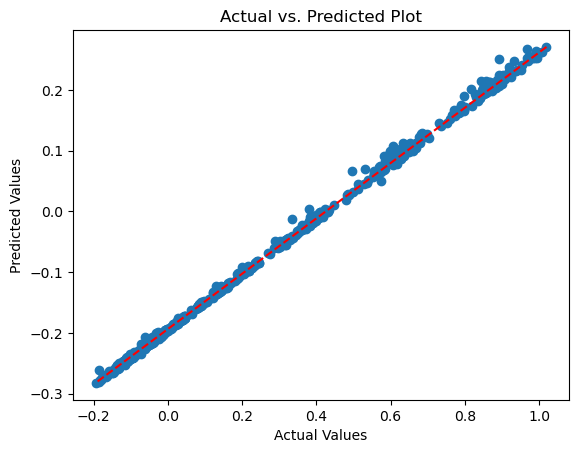

In [9]:
plt.scatter(y_test, y_pred)
plt.plot([max(y_test), min(y_test)], [max(y_pred), min(y_pred)], color = 'red', linestyle = '--')
plt.title("Actual vs. Predicted Plot")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()